In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv(r"/content/drive/MyDrive/TABLE DATA SET/train.csv")
df.head()

,image_id,xmin,ymin,xmax,ymax,label
0,0101_003.png,770,946,2070,2973,table
1,0110_099.png,270,1653,2280,2580,table
2,0113_013.png,303,343,2273,2953,table
3,0140_007.png,664,1782,1814,2076,table
4,0146_281.png,704,432,1744,1552,table


In [3]:
df['image_width'] = 0
df['image_height'] = 0
df['xmin_norm'] = 0
df['ymin_norm'] = 0
df['xmax_norm'] = 0
df['ymax_norm'] = 0
df.head()

,image_id,xmin,ymin,xmax,ymax,label,image_width,image_height,xmin_norm,ymin_norm,xmax_norm,ymax_norm
0,0101_003.png,770,946,2070,2973,table,0,0,0,0,0,0
1,0110_099.png,270,1653,2280,2580,table,0,0,0,0,0,0
2,0113_013.png,303,343,2273,2953,table,0,0,0,0,0,0
3,0140_007.png,664,1782,1814,2076,table,0,0,0,0,0,0
4,0146_281.png,704,432,1744,1552,table,0,0,0,0,0,0


In [4]:
import cv2

for i in range(df.shape[0]):
    try:
        img = cv2.imread(r"/content/drive/MyDrive/TABLE DATA SET/images/train/"+df.iloc[i,0])
        df.loc[i,['image_width']] = img.shape[1]
        df.loc[i,['image_height']] = img.shape[0]
        df.loc[i,['xmin_norm']] = df.loc[i,['xmin']].values/img.shape[1]
        df.loc[i,['ymin_norm']] = df.loc[i,['ymin']].values/img.shape[0]
        df.loc[i,['xmax_norm']] = df.loc[i,['xmax']].values/img.shape[1]       
        df.loc[i,['ymax_norm']] = df.loc[i,['ymax']].values/img.shape[0]
    except:
        pass
df.head()

,image_id,xmin,ymin,xmax,ymax,label,image_width,image_height,xmin_norm,ymin_norm,xmax_norm,ymax_norm
0,0101_003.png,770,946,2070,2973,table,2544,3300,0.302673,0.286667,0.813679,0.900909
1,0110_099.png,270,1653,2280,2580,table,2544,3300,0.106132,0.500909,0.896226,0.781818
2,0113_013.png,303,343,2273,2953,table,2544,3300,0.119104,0.103939,0.893475,0.894848
3,0140_007.png,664,1782,1814,2076,table,2560,3300,0.259375,0.540000,0.708594,0.629091
4,0146_281.png,704,432,1744,1552,table,2544,3300,0.276730,0.130909,0.685535,0.470303


In [ ]:
import os
os.chdir(r"/content/drive/MyDrive/TABLE DATA SET/labels/train")

for x in df['image_id'].unique():
    df1 = df[df['image_id']==x]
    if df1.iloc[0,8:-1].values.sum() != 0:
      filename = x.replace(".png","")+".txt"
      with open(filename,"w") as f:
          for i in range(df1.shape[0]):
              z = "'0' + ' '+str(round((df1.iloc[i,8]+df1.iloc[i,10])/2,5))+' '+str(round((df1.iloc[i,9]+df1.iloc[i,11])/2,5))+' '+str(round(df1.iloc[i,10]-df1.iloc[i,8],5))+' '+str(round(df1.iloc[i,11]-df1.iloc[i,9],5))"
              f.write(eval(z))
              f.write("\n")
        
      f.close()

In [9]:
df = pd.read_csv(r"/content/drive/MyDrive/TABLE DATA SET/val.csv")
df.head()

,image_id,xmin,ymin,xmax,ymax,label
0,9533_039.png,60,396,1113,2420,table
1,9533_039.png,1143,1126,2240,2230,table
2,9534_001.png,196,378,2146,956,table
3,9534_001.png,184,1028,2160,1636,table
4,9534_028.png,642,1388,1944,1981,table


In [10]:
df['image_width'] = 0
df['image_height'] = 0
df['xmin_norm'] = 0
df['ymin_norm'] = 0
df['xmax_norm'] = 0
df['ymax_norm'] = 0
df.head()

,image_id,xmin,ymin,xmax,ymax,label,image_width,image_height,xmin_norm,ymin_norm,xmax_norm,ymax_norm
0,9533_039.png,60,396,1113,2420,table,0,0,0,0,0,0
1,9533_039.png,1143,1126,2240,2230,table,0,0,0,0,0,0
2,9534_001.png,196,378,2146,956,table,0,0,0,0,0,0
3,9534_001.png,184,1028,2160,1636,table,0,0,0,0,0,0
4,9534_028.png,642,1388,1944,1981,table,0,0,0,0,0,0


In [11]:
import cv2

for i in range(df.shape[0]):
    try:
        img = cv2.imread(r"/content/drive/MyDrive/TABLE DATA SET/images/test/"+df.iloc[i,0])
        df.loc[i,['image_width']] = img.shape[1]
        df.loc[i,['image_height']] = img.shape[0]
        df.loc[i,['xmin_norm']] = df.loc[i,['xmin']].values/img.shape[1]
        df.loc[i,['ymin_norm']] = df.loc[i,['ymin']].values/img.shape[0]
        df.loc[i,['xmax_norm']] = df.loc[i,['xmax']].values/img.shape[1]       
        df.loc[i,['ymax_norm']] = df.loc[i,['ymax']].values/img.shape[0]
    except:
        pass
df.head()

,image_id,xmin,ymin,xmax,ymax,label,image_width,image_height,xmin_norm,ymin_norm,xmax_norm,ymax_norm
0,9533_039.png,60,396,1113,2420,table,2552,3300,0.023511,0.120000,0.436129,0.733333
1,9533_039.png,1143,1126,2240,2230,table,2552,3300,0.447884,0.341212,0.877743,0.675758
2,9534_001.png,196,378,2146,956,table,2552,3300,0.076803,0.114545,0.840909,0.289697
3,9534_001.png,184,1028,2160,1636,table,2552,3300,0.072100,0.311515,0.846395,0.495758
4,9534_028.png,642,1388,1944,1981,table,2552,3300,0.251567,0.420606,0.761755,0.600303


In [12]:
import os
os.chdir(r"/content/drive/MyDrive/TABLE DATA SET/labels/test")

for x in df['image_id'].unique():
    df1 = df[df['image_id']==x]
    if df1.iloc[0,8:-1].values.sum() != 0:
      filename = x.replace(".png","")+".txt"
      with open(filename,"w") as f:
          for i in range(df1.shape[0]):
              z = "'0' + ' '+str(round((df1.iloc[i,8]+df1.iloc[i,10])/2,5))+' '+str(round((df1.iloc[i,9]+df1.iloc[i,11])/2,5))+' '+str(round(df1.iloc[i,10]-df1.iloc[i,8],5))+' '+str(round(df1.iloc[i,11]-df1.iloc[i,9],5))"
              f.write(eval(z))
              f.write("\n")
        
      f.close()

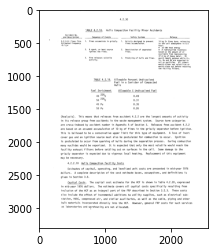

In [15]:
from matplotlib import pyplot as plt

img = cv2.imread(r"/content/drive/MyDrive/TABLE DATA SET/images/train/0147_125.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
with open(r"/content/drive/MyDrive/TABLE DATA SET/labels/train/0147_125.txt", 'r') as f:
    lst = f.readlines()
f.close()
lst3=[]
for x in lst:
    x=x.replace('\n','')
    lst1 = [float(x) for x in x.split()]
    lst2 = []
    for z in range(len(lst1)):
        if z==1:
            lst2.append(lst1[z]*img.shape[1])
        elif z==2:
            lst2.append(lst1[z]*img.shape[0])
        elif z==3:
            lst2.append(lst1[z]*img.shape[1])
        elif z==4:
            lst2.append(lst1[z]*img.shape[0])
        elif z==0:
            lst2.append(lst1[z])
    lst3.append(lst2)
lst3

[[0.0, 1310.0031999999999, 624.987, 2000.0, 574.0020000000001],
 [0.0, 1276.0064, 1349.007, 1043.9936, 330.0]]

0.0 (310, 337) (2310, 911)
0.0 (754, 1184) (1798, 1514)


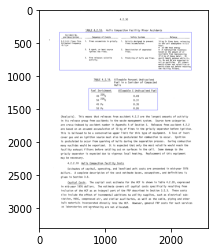

In [17]:
color = (255, 0, 0)
thickness = 2

for x in lst3:
    start_point = (int(x[1]-x[3]/2), int(x[2]-x[4]/2))
    end_point = (int(x[1]+x[3]/2), int(x[2]+x[4]/2))
    print(x[0], start_point, end_point)
    img = cv2.rectangle(img, start_point, end_point, color, thickness)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo

Cloning into 'yolov5'...
remote: Enumerating objects: 15236, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15236 (delta 6), reused 12 (delta 4), pack-reused 15218
Receiving objects: 100% (15236/15236), 14.17 MiB | 11.54 MiB/s, done.
Resolving deltas: 100% (10442/10442), done.


In [ ]:
!pip3 install -U -r yolov5/requirements.txt  # install dependencies

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [ ]:
import torch
from IPython.display import Image  # for displaying images

print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
%cat /content/drive/MyDrive/data.yaml


train: /content/drive/MyDrive/TABLE DATA SET/images/train
val: /content/drive/MyDrive/TABLE DATA SET/images/train
test: /content/drive/MyDrive/TABLE DATA SET/images/train

nc: 1
names: ['table']

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --project 'runs_table' --name 'feature_extraction' --img 640 --batch 20 --epochs 2 --data '/content/drive/MyDrive/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights ''

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/drive/MyDrive/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_table, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t